# Week 1 

The purpose of this week's excercise is twofold: First, introduce you to Numpy and making you familiar to the library and some of its pitfalls. Secondly, you will use this knowledge to estimate the linear model using OLS.

## A short introduction to Numpy and Linear Algebra (Linalg)
First, import all necessary packages. If you are missing a package, you can either install it through your terminal using pip, or an Anaconda terminal using conda.

In [1]:
import numpy as np
from numpy import linalg as la
from numpy import random as random
from tabulate import tabulate
from matplotlib import pyplot as plt

### Entering matrices manually
To create a $1\times9$ *row* vector write,

In [2]:
row = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
print(row)

[1 2 3 4 5 6 7 8 9]


To create a $9\times1$ *column* vector write,

In [3]:
col = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9]])
print(col)

[[1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]


An easier method is to define a row vector, and transpose it. Notice the double [[]]. Try to see what happens if you transpose a row vector using only [].

In [4]:
col = np.array([[1, 2, 3, 4, 5, 6, 7, 8, 9]]).T
print(col)

[[1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]


**A short note on numpy vectors**
Numpy does not treat vectors and matrices the same. A *true* numpy vector has the shape (k,), . The shape of a numpy array is an attribute, how do you call this attribute for the `row` and `col` arrays? What is the shape of the `row.T` array? 

In [5]:
# Call the shape attribute for the row and col vars. Check the shape of row.T
print(row.shape)
print(row.T.shape)
print(col.shape)

(9,)
(9,)
(9, 1)


To create a matrix, you combine what you have learned to manually create a $3 \times 3$ matrix called x, that has the numbers 0 to 8.

In [6]:
x = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
print(x)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


Create the same $3 \times 3$ using `np.arange()` and np.reshape()

In [7]:
x = np.arange(9)
x = x.reshape(3, 3)
print(x)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


### Matrix calculations 
There are several types of matrix calculations available to us with the numpy library, and we will introduce some here.

For matrix **multiplication** you can for the matrices `a` and `b` use `a@b`, `np.dot(a, b)` or `a.dot(b)`

Use the `row`, `col` vectors and `x` matrix and perform these matrix multiplications. Does the `row` vector behave as you would expect?

In [8]:
# Some examples:
# The row vector is (9,), and creates a scalar even though you don't transpose.
print(row@row)

# The col vector and x matrix behaves as expected
print(np.dot(col, col.T))
print(x.dot(x))

285
[[ 1  2  3  4  5  6  7  8  9]
 [ 2  4  6  8 10 12 14 16 18]
 [ 3  6  9 12 15 18 21 24 27]
 [ 4  8 12 16 20 24 28 32 36]
 [ 5 10 15 20 25 30 35 40 45]
 [ 6 12 18 24 30 36 42 48 54]
 [ 7 14 21 28 35 42 49 56 63]
 [ 8 16 24 32 40 48 56 64 72]
 [ 9 18 27 36 45 54 63 72 81]]
[[ 15  18  21]
 [ 42  54  66]
 [ 69  90 111]]


What happens if you use `/` and `*` operators with the  `row` and `col` vectors or the `x` matrix?

In [9]:
print(row/row)
print(col/row)
print(col/col.T)

[1. 1. 1. 1. 1. 1. 1. 1. 1.]
[[1.         0.5        0.33333333 0.25       0.2        0.16666667
  0.14285714 0.125      0.11111111]
 [2.         1.         0.66666667 0.5        0.4        0.33333333
  0.28571429 0.25       0.22222222]
 [3.         1.5        1.         0.75       0.6        0.5
  0.42857143 0.375      0.33333333]
 [4.         2.         1.33333333 1.         0.8        0.66666667
  0.57142857 0.5        0.44444444]
 [5.         2.5        1.66666667 1.25       1.         0.83333333
  0.71428571 0.625      0.55555556]
 [6.         3.         2.         1.5        1.2        1.
  0.85714286 0.75       0.66666667]
 [7.         3.5        2.33333333 1.75       1.4        1.16666667
  1.         0.875      0.77777778]
 [8.         4.         2.66666667 2.         1.6        1.33333333
  1.14285714 1.         0.88888889]
 [9.         4.5        3.         2.25       1.8        1.5
  1.28571429 1.125      1.        ]]
[[1.         0.5        0.33333333 0.25       0.2       

In [10]:
print(x/x)
print(x*x)
print(row*row)

[[nan  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]]
[[ 0  1  4]
 [ 9 16 25]
 [36 49 64]]
[ 1  4  9 16 25 36 49 64 81]


<ipython-input-10-0f07f9ebda91>:1: RuntimeWarning: invalid value encountered in true_divide
  print(x/x)


For OLS we need to be able to calculate the inverse. This is done with the `linalg` submodule. Create a new matrix that we can calculate the inverse on. Why can't we take the inverse of `x`?

In [11]:
a = np.array([[4, 9], [1, 3]])

In [12]:
print(la.inv(a))
print(la.inv(x))

[[ 1.         -3.        ]
 [-0.33333333  1.33333333]]


LinAlgError: Singular matrix

We cannot take the inverse of `x`, what do we normaly need to check before we take the inverse? What `numpy.linalg` method can we use to help us check for this?

In [13]:
print(la.matrix_rank(x))
print(la.eig(x))
print(la.det(x))

2
(array([2.02399203e+02, 1.60079682e+00, 8.60787866e-15]), array([[-0.4663281 , -0.78477477,  0.40824829],
       [-0.57099079, -0.08545673, -0.81649658],
       [-0.67565348,  0.61386131,  0.40824829]]))


Scalar operations can be performed as usual with `*` and `/`, and behaves as expected.

In [14]:
print(a/2)
print(a*2)

[[2.  4.5]
 [0.5 1.5]]
[[ 8 18]
 [ 2  6]]


### Stack vectors or matrices together
If you have several 1-D vectors (has the shape (k,)), you can use `np.column_stack()` to get a matrix with the input vectors put together as column.

If you have matrices (or arrays) that are multidimensional (have the shape (k, t)), you can use `np.hstack()` (means horizontal stack). This is very useful if you already have a matrix, and you want to add a vector.

Try to make a matrix with two `row` vectors, this should give you a $9 \times 2$ vector.

Make a new vector, and add it to the `x` matrix. This should then be a $3 \times 4$ matrix

In [15]:
print(np.column_stack((row, row)))
print(np.hstack((x, np.array([[9, 9, 9]]).T)))

[[1 1]
 [2 2]
 [3 3]
 [4 4]
 [5 5]
 [6 6]
 [7 7]
 [8 8]
 [9 9]]
[[0 1 2 9]
 [3 4 5 9]
 [6 7 8 9]]


### Other methods that you need to know.
The numpy library is vast. Some other methods that are useful are `ones`, `diag`, `diagonal`, `eye`.

## Exercise 1 - Data generation
### 1.1 
Create a synthetic dataset with the following characteristics

\begin{align}
    \boldsymbol{y_i} &= \beta_0 + \mathbf{x}_{1i}\beta_1 + \mathbf{x}_{2i}\beta_2 + \mathbf{\varepsilon}_i
\end{align}

where $\beta_0=1$, $\beta_1 = -0.5$, $\beta_2 = 2$, $\mathbf{x}_{1i} \sim \mathcal{N}(0, 4)$, $\mathbf{x}_{2i} \sim \mathcal{N}(5, 9)$, $\mathbf{\varepsilon}_i \sim \mathcal{N}(0, 1)$, and where $i = 0, ..., 99$. <br>
The code may look something like this:

In [44]:
# Create a seed to always have identical draws.
seed = 42
# Instance a random number generator using this seed.
rng = random.default_rng(seed=seed)
n = 100
b = np.array([1, -0.5, 2]).reshape(-1, 1)

# Make random draws from a normal distribution.
def random_draws(n):
    x0 = np.ones(n)
    x1 = rng.normal(0, 4, n)
    x2 = rng.normal(5, 9, n)
    eps = rng.normal(0, 1, n).reshape(-1, 1)
    

    # Stack the single columns into a matrix.
    return np.column_stack((x0, x1, x2)), eps

x, eps = random_draws(n)

# Create y using the betas and X.
y = x@b + eps

### 1.2 
Imagine that you had not generated the dataset yourself, but that you were given a similar data set that was already collected (generated) and ready to analyze. What would you observe in that data set?

## Exercise 2 - OLS
### 2.1
Make sure that you remember the mathematical equation for the OLS estimation, which we will later use to estimate the beta coefficients using date from the previous excercise. <br> 
**Write out the OLS estimator in matrix form:**


$$\boldsymbol{\hat{\beta}} = (\mathbf{X}'\mathbf{X})^{-1} \mathbf{X'}\mathbf{y}$$

*Hint: Look it up on p.53 in Wooldridge*

### 2.2
As you might remember, to perform inference on the OLS estimators, we need to calculate the standard errors for the previously estimates OLS coefficients. Again, make sure you remember its equation, *and write up the OLS standard errors in matrix form:*

$\mathbf{\widehat{Var(\boldsymbol{\hat{\beta}})}} = \hat{\sigma}^2 (\mathbf{X'}\mathbf{X)^{-1}}$, for $\hat{\sigma}^2 = \frac{SSR}{N - K}$, <br>

where $SSR = \sum_{i=0}^{N - 1} \mathbf{\hat{u}}^2_i$, N is the number of observations, and K is the number of explanatory variables including the constant.

*Hint: Look it up on p.55 in Wooldridge* <br>
*Hint: Remember that the variance is a function of $\sigma^2$, which is calculated using SSR*

### 2.3
Estimate $\hat{\beta}$ from the synthetic data set. Furthermore, calculate standard errors and t-values (assuming that the assumptions of the classical linear regression model are satisfied). The code may look something like this:

In [17]:
def ols_estimation(y, x):
    # Make sure that y and x are 2-D.
    y = y.reshape(-1, 1)
    if len(x.shape)<2:
        x = x.reshape(-1, 1)

    # Estimate beta
    b_hat = la.inv((x.T@x))@(x.T@y)

    # Calculate standard errors
    residual = y - x@b_hat
    sigma = residual.T@residual
    cov = sigma*la.inv(x.T@x)/(n - b.size)
    se = np.sqrt(cov.diagonal()).reshape(-1, 1)  # The diagonal method returns 1d array.

    # Calculate t-values
    t_values = b_hat/se
    return b_hat, se, t_values

b_hat, se, t_values = ols_estimation(y, x)

I have written a code to print a table, using the `tabulate` package.

In [18]:
def print_table(row_names, b, b_hat, se, t_values):
    table = []

    # Make a list, where each row contains the estimated and calculated values.
    for index, name in enumerate(row_names):
        table_row = [
            name, b[index], b_hat[index], se[index], t_values[index]
        ]
        table.append(table_row)

    # Print the list using the tabulate class.
    headers = ['', '\u03b2', '\u03b2\u0302 ', 'Se', 't-value']
    print('OLS Estimates:\n')
    print(tabulate(table, headers, floatfmt=['', '.1f', '.3f', '.3f', '.1f']))
    
row_names = ['b0', 'b1', 'b2']
print_table(row_names, b, b_hat, se, t_values)

OLS Estimates:

       β      β̂      Se    t-value
--  ----  ------  -----  ---------
b0   1.0   0.929  0.119        7.8
b1  -0.5  -0.503  0.034      -14.9
b2   2.0   2.002  0.012      168.9


## Exercise 3 - a simple Monte Carlo Experiment
Carry out a Monte Carlo experiment with $S = 200$ replications and $N = 100$ observations to check if the OLS estimator provides an unbiased estimate of $\beta$
### 3.1
Generate 200 data sets similar to what you did in exercise 1, and estimate $\beta$ on each of them.

*Hint:* Start by making prefilling two arrays using `np.zeros`, one array to store the estimated beta coefficients, and one to store the estimated standard errors. What shape should these arrays have?

Then make a loop where each loop makes a random draw, and then estimates on this random draw. And finally stores the estimated coefficients and standard errors.

In [48]:
# Initialize the variables and lists
s = 200
n = 100

# Allocate memory for arrays to later fill
b_coeffs = np.zeros((s, b.size))
b_ses = np.zeros((s, b.size))

for i in range(s):
    # Generate data
    x, eps = random_draws(n)
    y = x@b + eps

    # Estimate coefficients and variance
    b_hat, se, t_values = ols_estimation(y, x)

    # Store estimates
    b_coeffs[i, :] = b_hat.T
    b_ses[i, :] = se.T

# Make sure that there are no more zeros left in the arrays.
assert np.all(b_coeffs) and np.all(b_ses), 'Not all coefficients or standard errors are non-zero.'

### 3.2
Do the following three calculations:
- Calculate the means of the estimates
- Calculate the means of the standard errors
- Calculate the standard error of the MC estimates

In [58]:
mean_b_hat = np.mean(b_coeffs, axis=0)
mean_b_se = np.mean(b_ses, axis=0)
mean_mc_se = np.sqrt((np.sum(
    (b_coeffs - np.mean(b_coeffs, axis=0))*(b_coeffs - np.mean(b_coeffs, axis=0)), axis=0)/(s - 1)
))

In [59]:
print(b.T)
print(mean_b_hat)
print(mean_b_se)
print(mean_mc_se)

[[ 1.  -0.5  2. ]]
[ 1.01814706 -0.50309345  1.99536519]
[0.19727131 0.05124039 0.03386238]
[0.19662985 0.05243916 0.03539977]


### 3.3
Draw a histogram for the 200 estimates of $\beta_1$

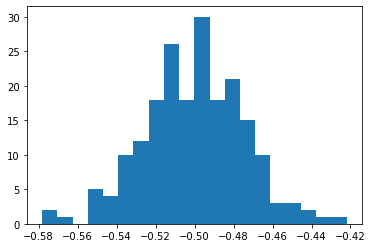

In [28]:
# Use matplotlib to plot the histogram. If you use jupyter notebook, include ";" to force
# the notebook to not print the return value (the plt method also returns the two arrays it
# use to plot the histogram, but we do not always want to see these).
plt.hist(b_coeffs[:, 1], bins=20) ;